# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
1-2 things we want to predict
Based on type of data we want to predict, categorical/discrete/boolean/etc.

Predict = Price
Categorize = 




In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
warnings.filterwarnings('ignore') #ignoring warnings

In [4]:
# NOTE: need to change file per user
df_raw = pd.read_csv('data/kaggle_used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')

In [5]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FTEW1CP3LFC52880,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,Huntsville,20.0,NaN,...,A,Automatic,t87709,XL SuperCrew RWD,NaN,4X2,4X2,145 in,96.8 in,2020
1,3N1CP5CV6LL501109,33.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,Opelousas,31.0,NaN,...,CVT,Continuously Variable Transmission,t90150,SV FWD,NaN,FWD,Front-Wheel Drive,103.1 in,69.3 in,2020
2,5LM5J7XC5LGL29065,40.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fort Myers,17.0,NaN,...,A,Automatic,t85101,Reserve AWD,NaN,AWD,All-Wheel Drive,119 in,89.9 in,2020
3,VB57A151926,NaN,NaN,NaN,NaN,NaN,NaN,Boerne,NaN,NaN,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
4,1G1FE1R76L0144294,29.9 in,NaN,NaN,NaN,Coupe,NaN,Peoria,16.0,NaN,...,M,6-Speed Manual,t85926,1SS Coupe RWD,NaN,RWD,Rear-Wheel Drive,110.7 in,74.7 in,2020


In [6]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 30000
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

In [7]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   30000 non-null  object 
 1   body_type             29851 non-null  object 
 2   city                  30000 non-null  object 
 3   city_fuel_economy     25067 non-null  float64
 4   combine_fuel_economy  0 non-null      float64
 5   daysonmarket          30000 non-null  int64  
 6   engine_cylinders      28994 non-null  object 
 7   engine_displacement   28227 non-null  float64
 8   engine_type           28994 non-null  object 
 9   exterior_color        30000 non-null  object 
 10  frame_damaged         15820 non-null  object 
 11  franchise_dealer      30000 non-null  bool   
 12  franchise_make        24272 non-null  object 
 13  fuel_tank_volume      28366 non-null  object 
 14  fuel_type             29156 non-null  object 
 15  has_accidents      

### Data Quality

<AxesSubplot:>

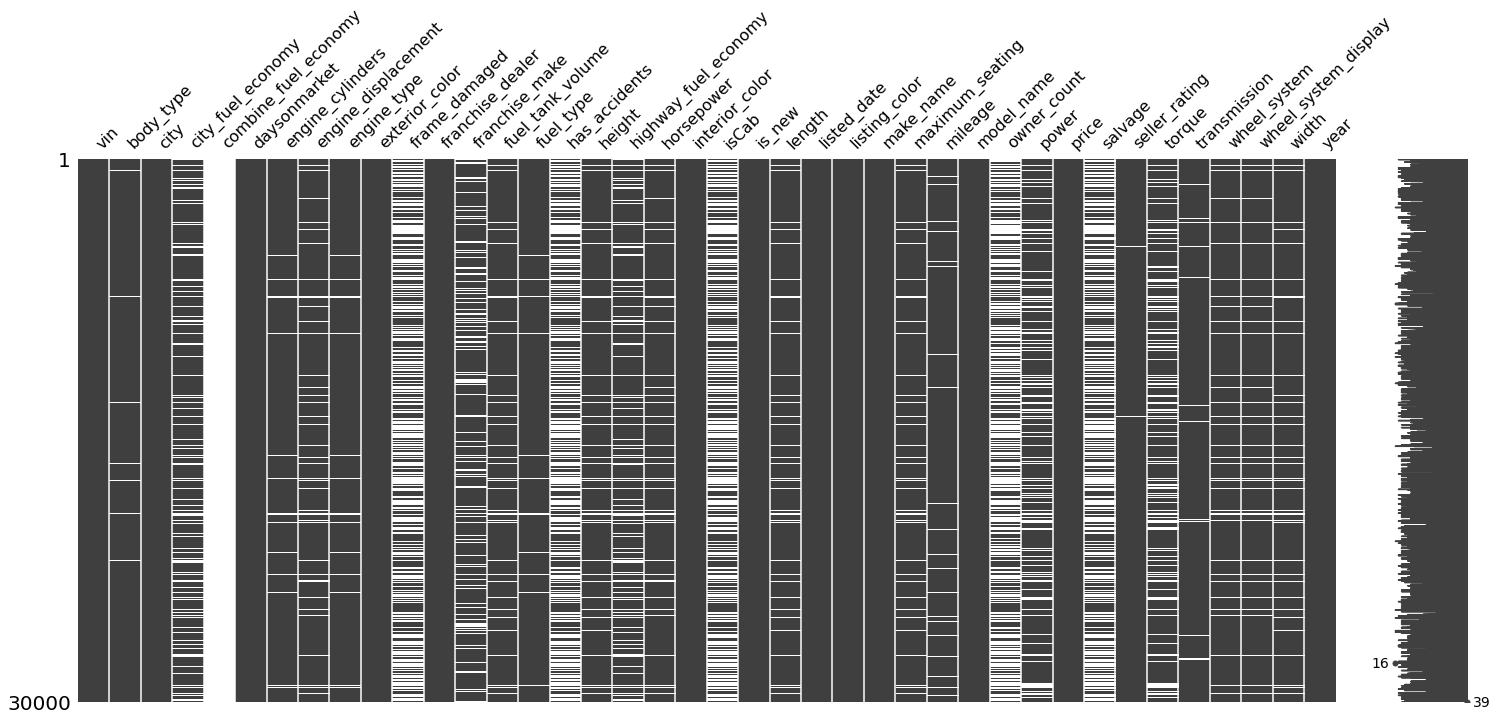

In [8]:
msno.matrix(df_cln_1)

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

In [9]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

In [10]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [11]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

      wheel_system
0              4X2
1              FWD
2              AWD
3              NaN
4              RWD
...            ...
29995          4WD
29996          FWD
29997          NaN
29998          FWD
29999          AWD

[30000 rows x 1 columns]
      wheel_system_display
0                      4X2
1        Front-Wheel Drive
2          All-Wheel Drive
3                      NaN
4         Rear-Wheel Drive
...                    ...
29995     Four-Wheel Drive
29996    Front-Wheel Drive
29997                  NaN
29998    Front-Wheel Drive
29999      All-Wheel Drive

[30000 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (since the color attribute is also not consistently 1 color). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing.

In [12]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

2906
36


In [13]:
#note this plot takes forever to run
(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

PlotnineError: "Could not evaluate the 'x' mapping: 'interior_color' (original error: name 'interior_color' is not defined)"

Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

In [14]:
df_cln_1 = df_cln_1.drop(columns='daysonmarket')
print(df_cln_1.shape[1])

35


### Data Cleaning - Missing Data & Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

In [15]:
# remove the missing values
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

6990


In [16]:
# checking the row counts of columns to see the missing rows
df_cln_2.count()

vin                     6990
body_type               6990
city                    6990
city_fuel_economy       6990
engine_displacement     6990
engine_type             6990
exterior_color          6990
frame_damaged           6990
franchise_dealer        6990
franchise_make          6990
fuel_tank_volume        6990
fuel_type               6990
has_accidents           6990
height                  6990
highway_fuel_economy    6990
horsepower              6990
isCab                   6990
is_new                  6990
length                  6990
listed_date             6990
listing_color           6990
make_name               6990
maximum_seating         6990
mileage                 6990
model_name              6990
owner_count             6990
power                   6990
price                   6990
salvage                 6990
seller_rating           6990
torque                  6990
transmission            6990
wheel_system            6990
width                   6990
year          

<AxesSubplot:>

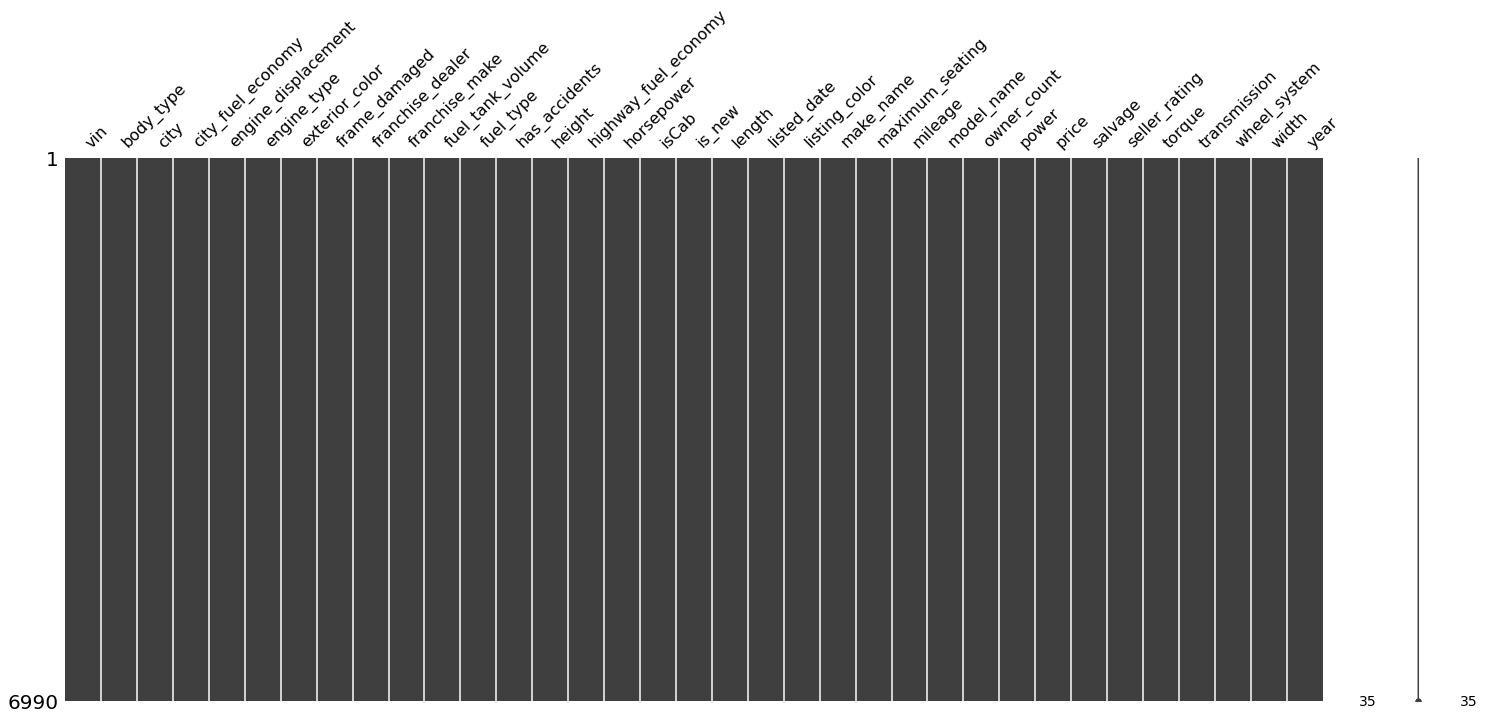

In [17]:
#visualizatin of our data after removing all rows with missing data
msno.matrix(df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [19]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','interior_color','isCab','is_new','length','listed_date','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','wheel_system_display','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'V8' 'V6' 'V6 Flex Fuel Vehicle' 'V8 Flex Fuel Vehicle' 'H4' 'I6'
 'I5' 'H6' 'I4 Flex Fuel Vehicle' 'I4 Diesel' 'I6 Diesel' 'I3' 'V12'
 'V6 Biodiesel' 'W12' 'V6 Diesel' 'I4 Hybrid']
['granite crystal metallic clearcoat' 'Alien II' 'Black' ...
 'Oceanus Pearl' 'Phantom Gray Metallic' 'RED ALERT']
[False True]
[ True]
['Ford' 'Jeep' 'Chevrolet' 'Subaru' 'Kia' 'Nissan' 'Mazda' 'Lexus' 'Honda'
 'INFINITI' 'Hyundai' 'Buick' 'BMW' 'Toyota' 'Aston Martin'
 'Mercedes-Benz' 'Cadillac' 'Volkswagen' 'RAM' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Genesis' 'Lincoln' 'Dodge' 'Rolls-Royce' 'Chrysler'
 'Porsche' 'Land Rover' 'Audi' 'FIAT' 'Acura' 'GMC' 'Scion' 'Maserati'
 'Lamborghini' 'Lotus' 'MINI' 'Alfa Romeo' 'Bentley' 'Ferrari']
['13.5 gal' '14.2 gal' '26 gal' '18.8 gal' '19.5 gal' '15.9 gal'
 '18.5 gal' '15.5 gal' '14.5 gal' '22.4 gal' '20.1 gal' '17.4 gal'
 '16.4 gal' '15.6 gal' '13.2 gal' '19 gal' '14.8 gal' '15.1 gal'
 '23.3 gal' '14 gal' '22 gal' '21.1 gal' '18.1 gal' '12.4 gal' '16.9 gal'
 '13

KeyError: 'interior_color'

In [20]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

['13.5 gal' '14.2 gal' '26 gal' '18.8 gal' '19.5 gal' '15.9 gal'
 '18.5 gal' '15.5 gal' '14.5 gal' '22.4 gal' '20.1 gal' '17.4 gal'
 '16.4 gal' '15.6 gal' '13.2 gal' '19 gal' '14.8 gal' '15.1 gal'
 '23.3 gal' '14 gal' '22 gal' '21.1 gal' '18.1 gal' '12.4 gal' '16.9 gal'
 '13 gal' '24 gal' '15.7 gal' '32 gal' '23 gal' '18.6 gal' '28.3 gal'
 '21 gal' '16 gal' '18.3 gal' '24.6 gal' '15.4 gal' '20 gal' '16.2 gal'
 '12.2 gal' '21.5 gal' '19.2 gal' '18 gal' '17 gal' '27.6 gal' '31 gal'
 '17.2 gal' '22.5 gal' '20.3 gal' '15.8 gal' '15.3 gal' '33.5 gal'
 '16.5 gal' '21.7 gal' '16.6 gal' '26.4 gal' '10.6 gal' '23.7 gal'
 '23.8 gal' '19.8 gal' '19.4 gal' '16.1 gal' '13.6 gal' '12.8 gal'
 '18.4 gal' '14.9 gal' '14.3 gal' '15 gal' '22.2 gal' '12.7 gal'
 '27.7 gal' '11.9 gal' '16.3 gal' '10.8 gal' '19.3 gal' '17.1 gal'
 '16.8 gal' '20.5 gal' '11.8 gal' '36 gal' '17.7 gal' '38 gal' '17.3 gal'
 '11.6 gal' '17.5 gal' '13.7 gal' '27 gal' '9.2 gal' '19.1 gal' '30 gal'
 '17.8 gal' '11.4 gal' '10.5 gal' '

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [21]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [22]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   6990 non-null   object 
 1   body_type             6990 non-null   object 
 2   city                  6990 non-null   object 
 3   city_fuel_economy     6990 non-null   float64
 4   engine_displacement   6990 non-null   float64
 5   engine_type           6990 non-null   object 
 6   exterior_color        6990 non-null   object 
 7   frame_damaged         6990 non-null   object 
 8   franchise_dealer      6990 non-null   bool   
 9   franchise_make        6990 non-null   object 
 10  fuel_tank_volume      6987 non-null   float64
 11  fuel_type             6990 non-null   object 
 12  has_accidents         6990 non-null   object 
 13  height                6989 non-null   float64
 14  highway_fuel_economy  6990 non-null   float64
 15  horsepower          

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data. 

In [23]:
df_final = df_cln_2.iloc[:, np.r_[1,3:5,7,12,14:16,17,22:24,25,27,29,34]]
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             6990 non-null   object 
 1   city_fuel_economy     6990 non-null   float64
 2   engine_displacement   6990 non-null   float64
 3   frame_damaged         6990 non-null   object 
 4   has_accidents         6990 non-null   object 
 5   highway_fuel_economy  6990 non-null   float64
 6   horsepower            6990 non-null   float64
 7   is_new                6990 non-null   bool   
 8   maximum_seating       6989 non-null   float64
 9   mileage               6990 non-null   float64
 10  owner_count           6990 non-null   float64
 11  price                 6990 non-null   float64
 12  seller_rating         6990 non-null   float64
 13  year                  6990 non-null   int64  
dtypes: bool(1), float64(9), int64(1), object(3)
memory usage: 1.1+ MB
None


# Simple Statistics

##### Look at the final data, we have total 15 columns, their data types are: bool(1), float64(9), int64(1), object(3).
     Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             6990 non-null   object 
 1   city_fuel_economy     6990 non-null   float64
 2   engine_displacement   6990 non-null   float64
 3   frame_damaged         6990 non-null   object 
 4   has_accidents         6990 non-null   object 
 5   highway_fuel_economy  6990 non-null   float64
 6   horsepower            6990 non-null   float64
 7   is_new                6990 non-null   bool   
 8   maximum_seating       6989 non-null   float64
 9   mileage               6990 non-null   float64
 10  owner_count           6990 non-null   float64
 11  price                 6990 non-null   float64
 12  seller_rating         6990 non-null   float64
 13  year                  6990 non-null   int64  
dtypes: bool(1), float64(9), int64(1), object(3)

As our main goal is to predict car price and car type,in the simple statistics we need to find out the 5 most significant attributes that affect the car price, which's divided to below 5 steps:
1.Check the data range, mode, mean, median, variance and counts, etc
2.Check data normality
3.Correlation check
4.With the result from correlation checking,the 5 most significan attributes are horsepower(0.629),mileage(-0.43),highway_fuel_economy(-0.401), year(0.371) and engine_displacement(0.427)
The intresting thing is that seller_rating and owner_count don't show strong relationship to car price from correlation checking, they're only -0.219 and -0.035


## Data description

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [25]:
df_final.describe()

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,maximum_seating,mileage,owner_count,price,seller_rating,year
count,6990.000000,6990.000000,6990.000000,6990.000000,6989.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000
mean,21.135336,2944.620887,28.546352,247.237339,5.529690,45334.709871,1.325465,24261.260801,4.272024,2016.718598
std,4.689225,1158.709963,5.615353,83.563441,1.130893,35403.358402,0.648646,13363.107872,0.492428,2.800606
min,10.000000,1000.000000,14.000000,74.000000,2.000000,9.000000,1.000000,900.000000,1.000000,1984.000000
25%,18.000000,2000.000000,24.000000,178.000000,5.000000,22501.250000,1.000000,16200.000000,4.000000,2016.000000
50%,21.000000,2500.000000,28.000000,245.000000,5.000000,35429.000000,1.000000,21500.000000,4.347826,2017.000000
75%,25.000000,3600.000000,32.000000,295.000000,6.000000,58399.250000,2.000000,29995.000000,4.600000,2019.000000
max,66.000000,7000.000000,68.000000,808.000000,15.000000,284125.000000,8.000000,378888.000000,5.000000,2020.000000


#### Median, Standard Deviation, Mean in a Pandas Dataframe

In [26]:
descr = df_final['price'].aggregate([np.median, np.std, np.mean]).reset_index()
descr

,index,price
0,median,21500.000000
1,std,13363.107872
2,mean,24261.260801


#### Inter quartile range

In [27]:
df_final.describe()['price'][['25%', '50%', '75%']]

25%    16200.0
50%    21500.0
75%    29995.0
Name: price, dtype: float64

In [28]:
print(df_final.count())

body_type               6990
city_fuel_economy       6990
engine_displacement     6990
frame_damaged           6990
has_accidents           6990
highway_fuel_economy    6990
horsepower              6990
is_new                  6990
maximum_seating         6989
mileage                 6990
owner_count             6990
price                   6990
seller_rating           6990
year                    6990
dtype: int64


In [29]:
#check the count of new cars
df_final['is_new'].values.sum() 

5

In [30]:
#check the count of used cars
(~df_final['is_new']).values.sum()

6985

#Check the number of different types'cars that have accidents or no accidents, total 837 cars have accidents. Suv/Crossover and Sedan cars have higher numbers of accidents, as their count are larger too. Maybe people love SUV and Sedan cars more than others.

In [67]:
#check the count of cars have accidents
df_final['has_accidents'].values.sum() 

837

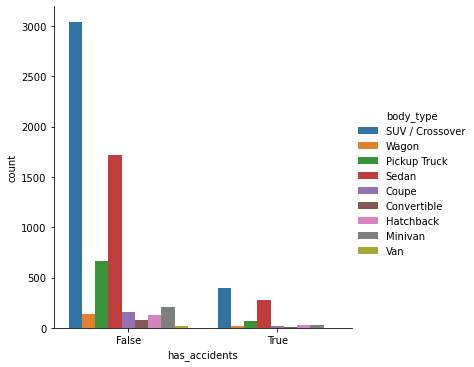

In [68]:
#Visulize the number of different type of cars that have accidents or not.
sns.catplot(x="has_accidents", kind="count",hue='body_type', data=df_final)

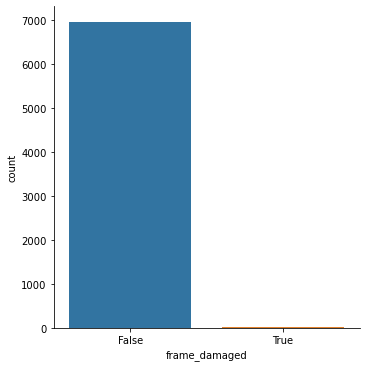

In [32]:
#Visualize the number of frame damaged cars
sns.catplot(x="frame_damaged", kind="count", data=df_final)

In [33]:
#check the count of frame_damaged cars
df_final['frame_damaged'].values.sum()

23

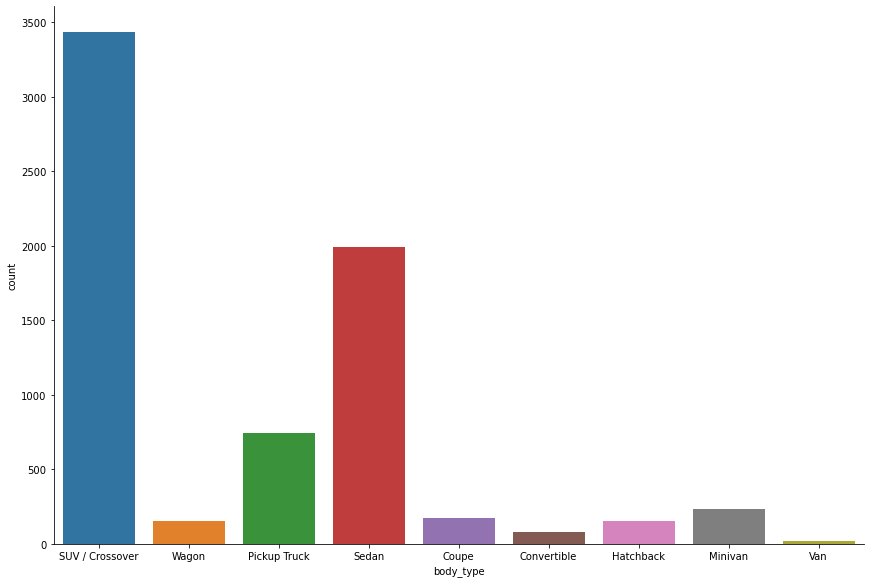

In [93]:
# check the number of different type of cars,it looks like SUV is the most popular car with almost 3500, Sedan is the 2nd most popular car.
sns.catplot(x="body_type", kind="count",data=df_final,height=8, aspect=1.5)


### Data normality check

In [65]:
##select all numberical data type from the final data
df_final_num=df_final.iloc[:, np.r_[1,2,5,6,8:13]]
print(df_final_num.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city_fuel_economy     6990 non-null   float64
 1   engine_displacement   6990 non-null   float64
 2   highway_fuel_economy  6990 non-null   float64
 3   horsepower            6990 non-null   float64
 4   maximum_seating       6989 non-null   float64
 5   mileage               6990 non-null   float64
 6   owner_count           6990 non-null   float64
 7   price                 6990 non-null   float64
 8   seller_rating         6990 non-null   float64
dtypes: float64(9)
memory usage: 866.1 KB
None


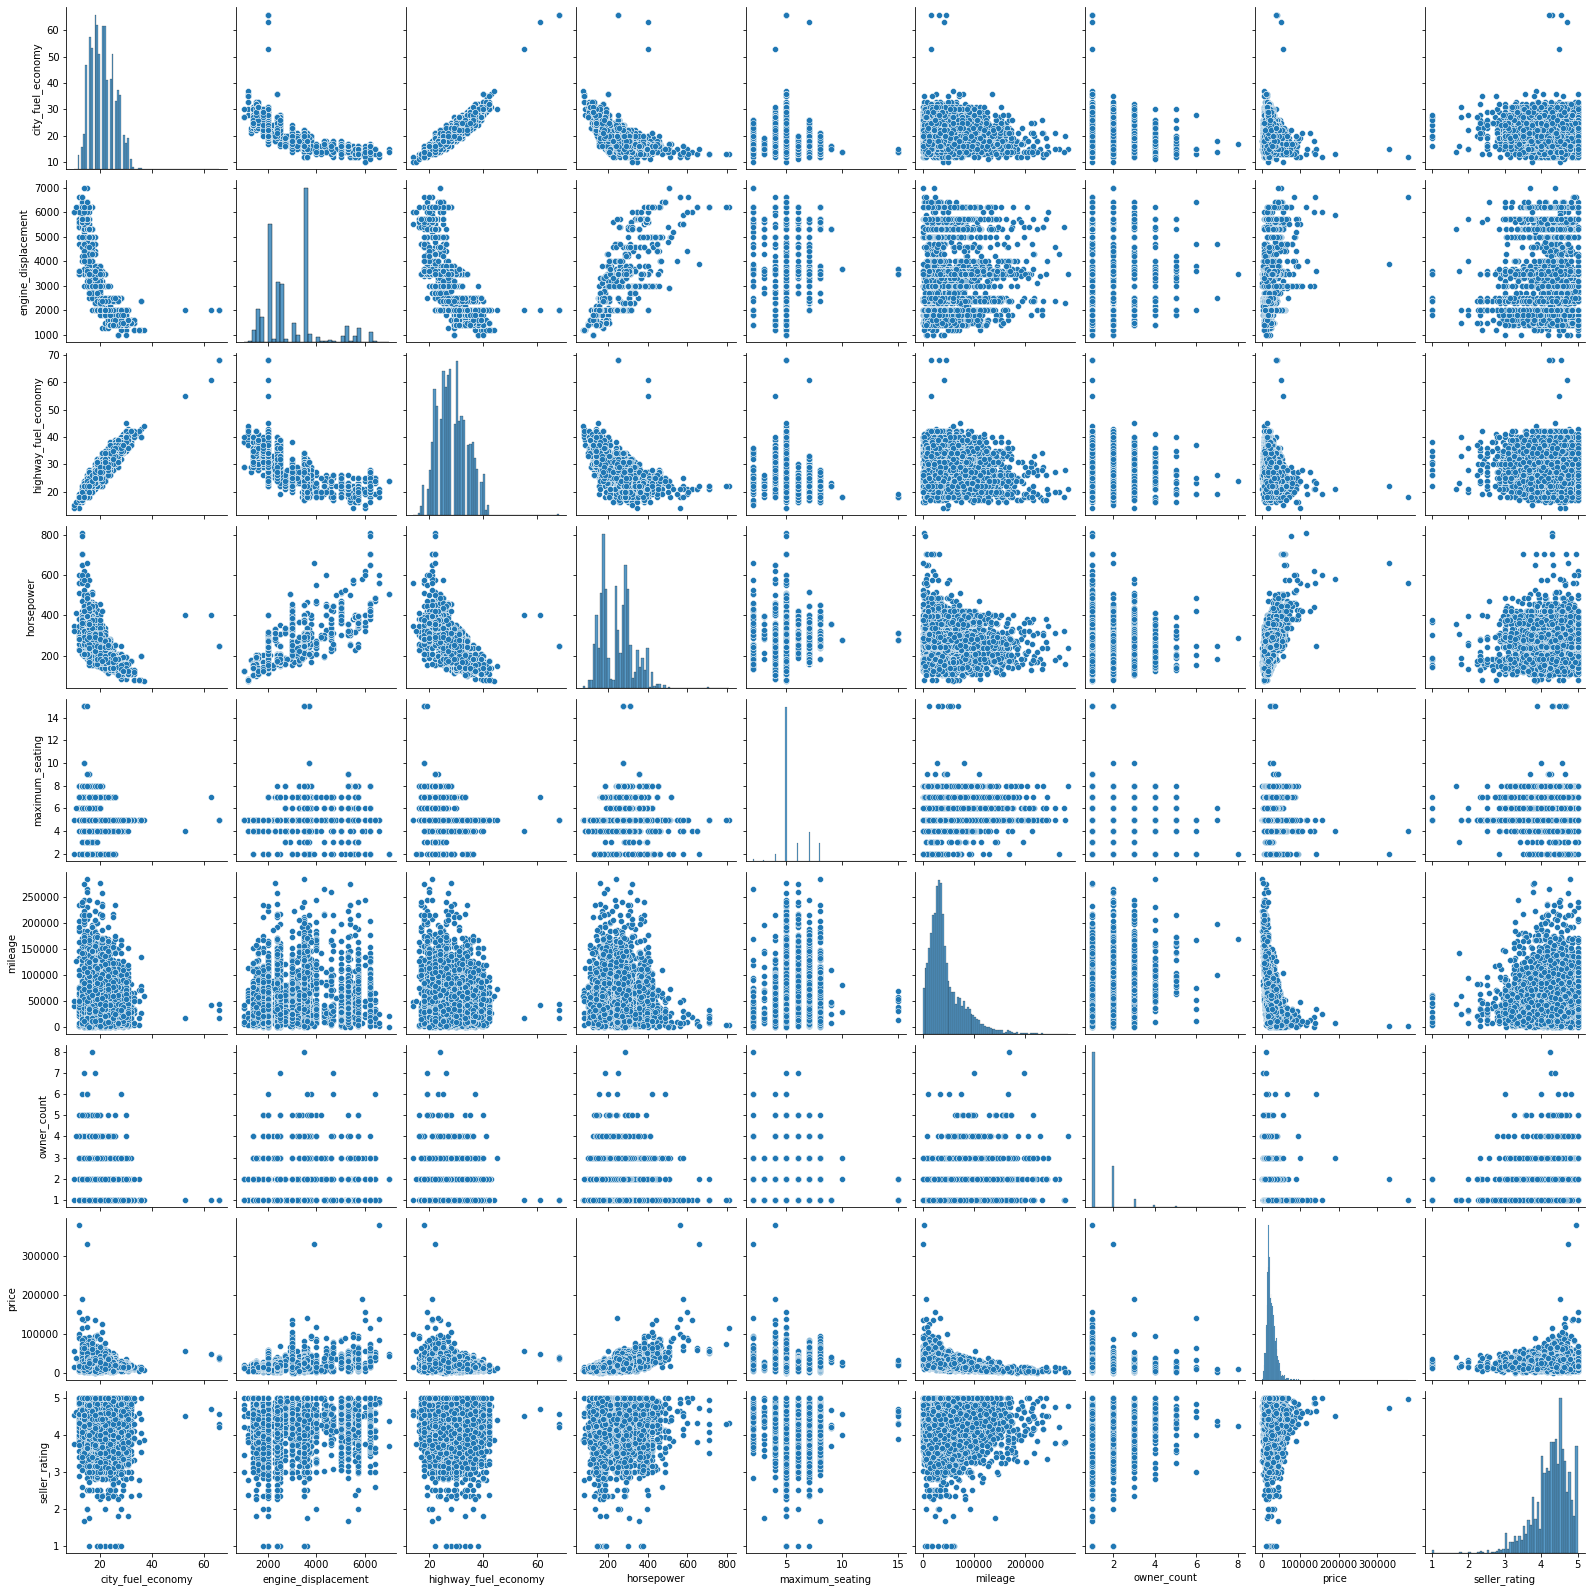

In [66]:
##check all numerical type data's normality with pairplot
sns.pairplot(df_final_num)

#### From the histogram, we may easily see  city_fuel_economy,engine_displacement and highway_fuel_economy more normally distributed than other columns. As our sample size is large enough,we use Central Limit Theorem rule and assume they're approximately normal.

### Correlation check

In [36]:
##data correlation with Spearman method
df_final.corr(method='spearman')

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,is_new,maximum_seating,mileage,owner_count,price,seller_rating,year
city_fuel_economy,1.000000,-0.852678,0.944125,-0.841853,-0.007569,-0.473122,-0.148380,-0.107991,-0.447934,-0.047096,0.112340
engine_displacement,-0.852678,1.000000,-0.774985,0.806029,-0.014556,0.458202,0.124191,0.081813,0.426333,0.005844,-0.074607
highway_fuel_economy,0.944125,-0.774985,1.000000,-0.770382,-0.014630,-0.482291,-0.100174,-0.058837,-0.482635,-0.048400,0.050865
horsepower,-0.841853,0.806029,-0.770382,1.000000,0.002814,0.396549,-0.019428,0.004039,0.649198,0.043606,0.049586
is_new,-0.007569,-0.014556,-0.014630,0.002814,1.000000,0.018109,-0.033176,-0.015427,0.030113,-0.005631,0.039852
maximum_seating,-0.473122,0.458202,-0.482291,0.396549,0.018109,1.000000,0.094126,-0.041291,0.245436,-0.001454,0.067320
mileage,-0.148380,0.124191,-0.100174,-0.019428,-0.033176,0.094126,1.000000,0.465074,-0.520918,-0.003430,-0.703496
owner_count,-0.107991,0.081813,-0.058837,0.004039,-0.015427,-0.041291,0.465074,1.000000,-0.328662,0.000039,-0.487999
price,-0.447934,0.426333,-0.482635,0.649198,0.030113,0.245436,-0.520918,-0.328662,1.000000,0.073262,0.506891
seller_rating,-0.047096,0.005844,-0.048400,0.043606,-0.005631,-0.001454,-0.003430,0.000039,0.073262,1.000000,-0.035593


In [37]:
#data correlation check
cormat = df_final.corr()

In [38]:
import numpy as np

def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,engine_displacement,highway_fuel_economy,horsepower,is_new,maximum_seating,mileage,owner_count,price,seller_rating,year
city_fuel_economy,-0.783,0.943,-0.778,-0.011,-0.399,-0.172,-0.12,-0.369,-0.047,0.173
engine_displacement,,-0.737,0.832,-0.014,0.378,0.116,0.078,0.427,0.007,-0.107
highway_fuel_economy,,,-0.727,-0.015,-0.409,-0.139,-0.078,-0.401,-0.044,0.129
horsepower,,,,0.002,0.306,-0.029,0.004,0.629,0.046,0.041
is_new,,,,,0.016,-0.026,-0.013,0.031,,0.028
maximum_seating,,,,,,0.075,-0.054,0.131,0.009,0.086
mileage,,,,,,,0.476,-0.43,0.013,-0.719
owner_count,,,,,,,,-0.219,-0.002,-0.529
price,,,,,,,,,0.086,0.371
seller_rating,,,,,,,,,,-0.035


In [39]:
### Result: We may see most significan attributes are Horsepower ,Mileage,highway_fuel_economy,Year,engine_displacement

<AxesSubplot:>

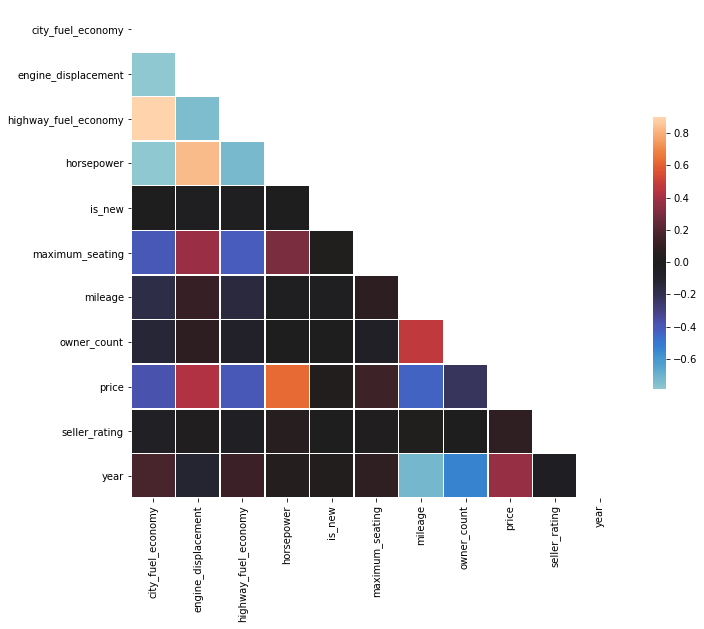

In [40]:
###Creating the Heatmap from the Post
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(11, 10))
sns.heatmap(cormat, mask=mask, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

# Visualize Attributes

### Visualization with Raincloud Plot 

In [94]:
pip install ptitprince

Note: you may need to restart the kernel to use updated packages.


In [95]:
%matplotlib inline
import pandas as pd
import ptitprince as pt
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

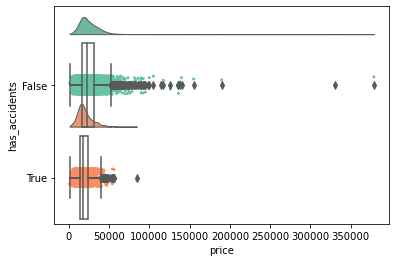

In [46]:
ax = pt.RainCloud(x = 'has_accidents', y = 'price', 
                  data = df_final, 
                  width_viol =  .5,
                  width_box =  .9,
                  orient = 'h',
                  move = .0)

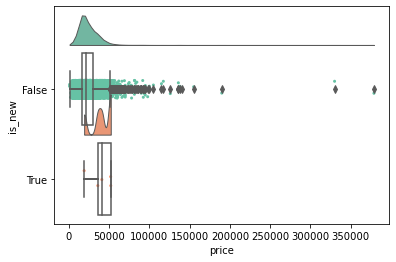

In [47]:
ax = pt.RainCloud(x = 'is_new', y = 'price', 
                  data = df_final, 
                  width_viol = .9,
                  width_box = .8,
                  orient = 'h',
                  move = .0)

In [48]:
## This shows the new car is more expensive than used car, the car had accident is less expensive than the car without accident

### Visualization with Pairplot using Seaborn

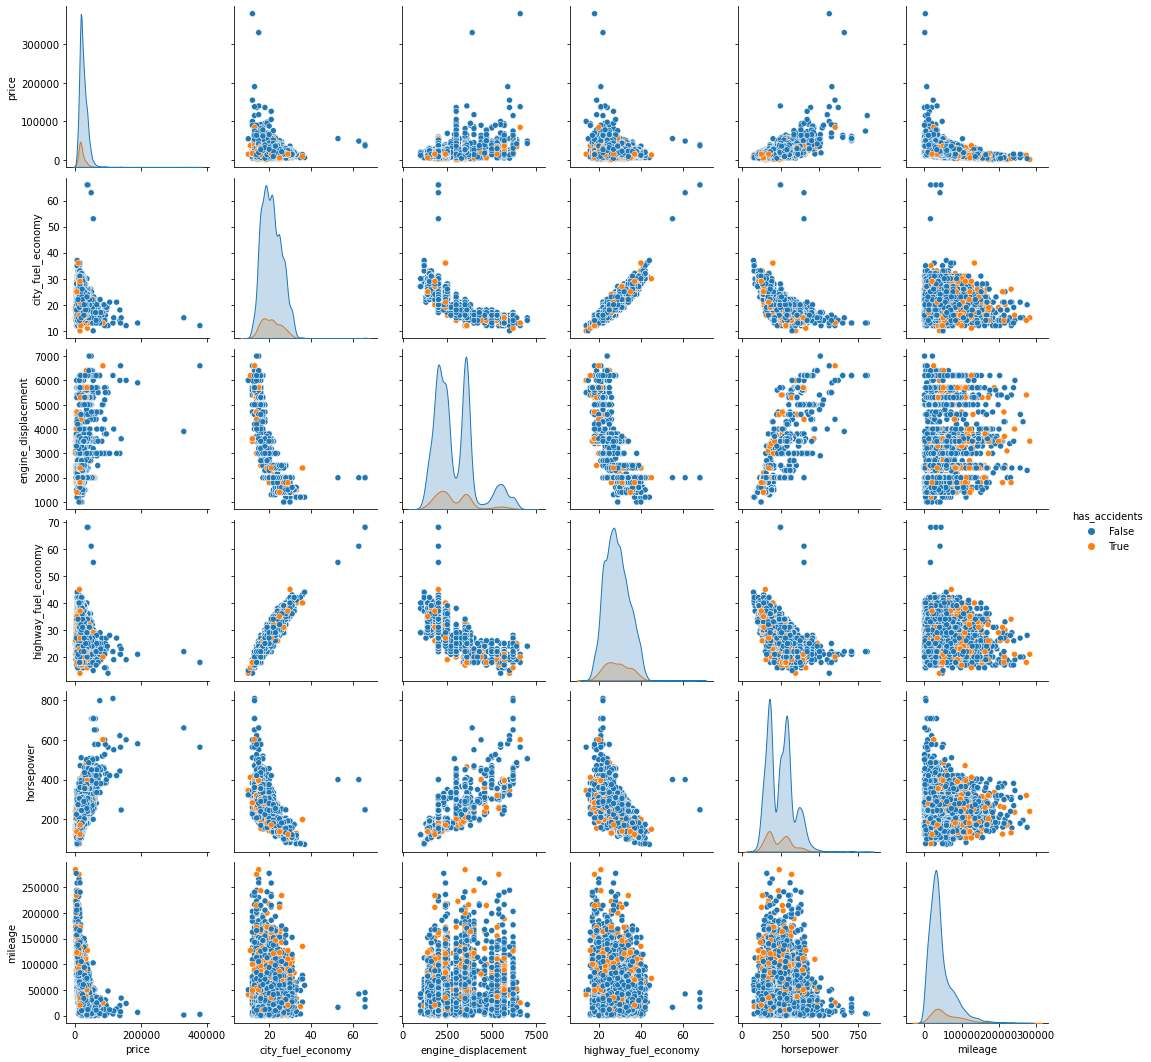

In [49]:
cols = ['price', 'city_fuel_economy','engine_displacement','highway_fuel_economy','horsepower','mileage']
ax = sns.pairplot(df_final, vars=cols, hue='has_accidents')

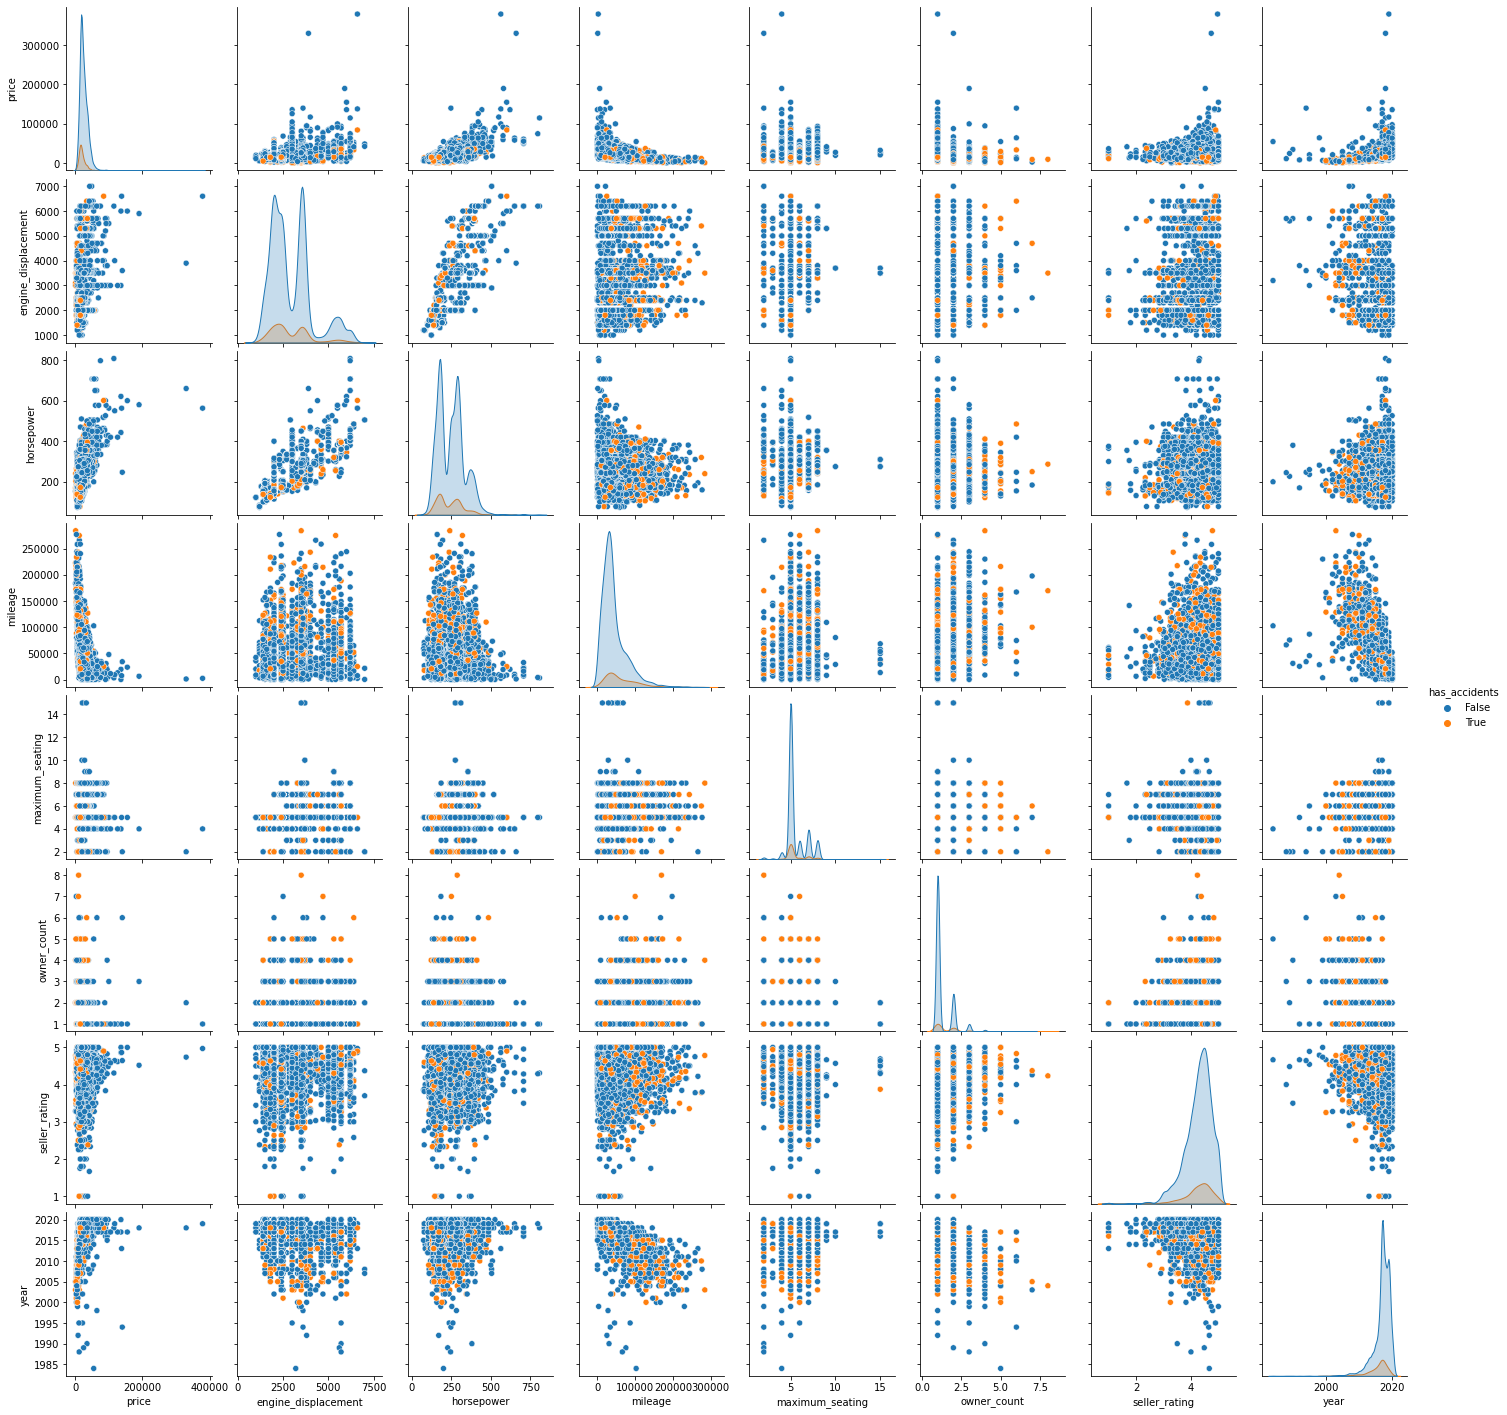

In [50]:
## From above result, we rerun it again without city fuel economy and highway_fuel economy
cols = ['price', 'engine_displacement','horsepower','mileage','maximum_seating','owner_count','seller_rating','year']
ax = sns.pairplot(df_final, vars=cols, hue='has_accidents')

###### Summary: The most significant attributes to the price are horsepower, mileage, year, highway_fuel_economy, engine_displacement, possible attributes are owner_count and seller_rating.

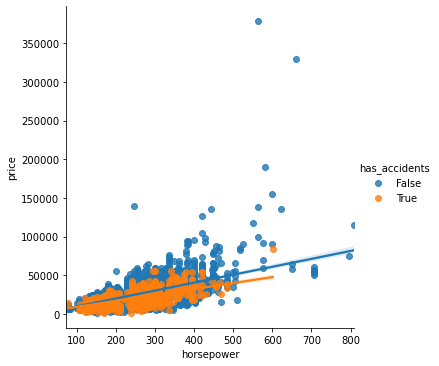

In [96]:
# Visualize the horsepower and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='horsepower', y='price', hue='has_accidents', data=df_final)

###### It shows positive relationship between horsepower and price


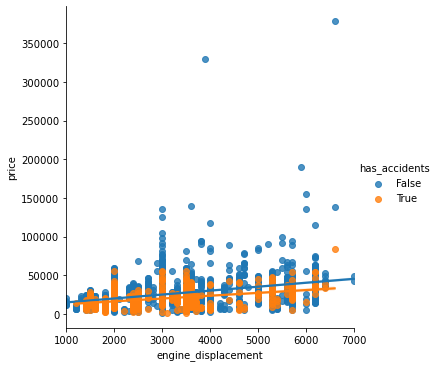

In [57]:
# Visualize the engine_displacement and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='engine_displacement', y='price', hue='has_accidents', data=df_final)

###### This shows positve relationship as well between price and engine_displacement

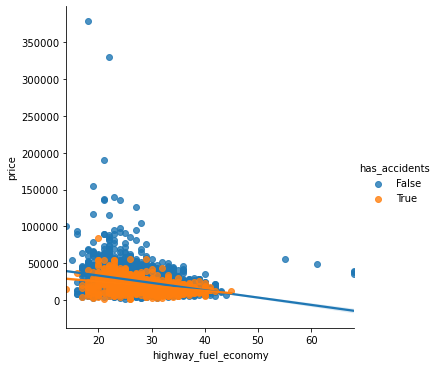

In [58]:
# Visualize the higway_fuel_economy and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='highway_fuel_economy', y='price', hue='has_accidents', data=df_final)

###### This shows negtive relationship as well between price and highway_fuel_economy

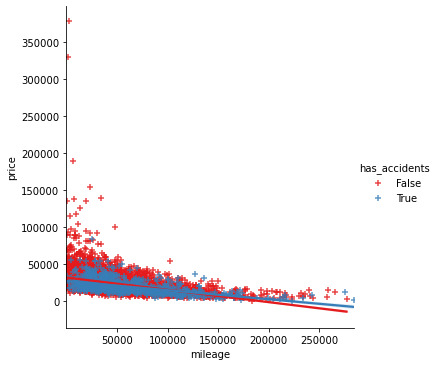

In [59]:
# Visualize the relationship between mileage and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='mileage', y='price', hue='has_accidents',palette="Set1", markers='+', data=df_final)

###### This shows negtive relationship as well between price and mileage

### Explore Joint Attributes

### Explore Attributes and Class

### New Features

### Exceptional Work